In [1]:
%matplotlib inline

import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation as anim
from datetime import datetime, timedelta
from osgeo import gdal
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [17]:
path_base = '/g/data/rr5/satellite/obs/himawari8/FLDK/'

band_suffix = np.array(['-P1S-ABOM_OBS_B01-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc',
                       '-P1S-ABOM_OBS_B02-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc',
                       '-P1S-ABOM_OBS_B03-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc',
                       '-P1S-ABOM_OBS_B08-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc',
                       '-P1S-ABOM_OBS_B13-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc',
                       '-P1S-ABOM_OBS_B15-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'])

In [3]:
s_time = datetime(2020,1,20,0,0,0) -timedelta(hours=10)
e_time = datetime(2020,1,20,16,0,0) -timedelta(hours=10)
space_minutes = 60

dif_minutes= (e_time - s_time)
dif_minutes= dif_minutes.seconds/60

t_range = np.arange(dif_minutes/space_minutes + 1)
print(t_range)
dates = np.array([s_time + timedelta(minutes=space_minutes*i) for i in t_range])
dates

NameError: name 'datetime' is not defined

In [26]:
# Set clip coords
# Australia
#lat0 = -9.975
#lat1 = -44.025
#lon0 = 111.975
#lon1 = 154.025
#res = 0.02

# NSW
#lat0 = -20.
#lat1 = -40.
#lon0 = 140.
#lon1 = 160.
#res = 0.02

# Canberra/south coast
lat0 = -33
lat1 = -38
lon0 = 147.
lon1 = 152.
res = 0.01

wgs84_wkt = 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.01745329251994328,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]]'

#arr_stack.shape

In [27]:
#Use clip coords to make extent and lat and long arrays for gdal
x_size = int((lon1 - lon0)/res)
y_size = int((lat1 - lat0)/(-1*res))

lats = np.linspace(lat0, lat1+res, num=y_size)
lons = np.linspace(lon0, lon1-res, num=x_size)

geot = [lon0, res, 0., lat0, 0., -1*res]

In [28]:
#Create array of paths
paths = ["" for x in range(len(dates))]

for jj in range(len(dates)):
    ii = dates[jj]
    paths[jj] = path_base + str(ii.year) +'/'+'%02i'%(ii.month) +'/'+ '%02i'%(ii.day) +'/'+ '%02i'%ii.hour +'%02i'%ii.minute+'/'+str(ii.year)+ '%02i'%(ii.month)+ '%02i'%(ii.day)+'%02i'%ii.hour +'%02i'%ii.minute+'00'
print(paths)

['/g/data/rr5/satellite/obs/himawari8/FLDK/2020/01/20/0200/20200120020000', '/g/data/rr5/satellite/obs/himawari8/FLDK/2020/01/20/0300/20200120030000', '/g/data/rr5/satellite/obs/himawari8/FLDK/2020/01/20/0400/20200120040000', '/g/data/rr5/satellite/obs/himawari8/FLDK/2020/01/20/0500/20200120050000', '/g/data/rr5/satellite/obs/himawari8/FLDK/2020/01/20/0600/20200120060000']


In [29]:
def plotter(arr,ii):
    plt.figure()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_title("%02i/%02i/%04i %02i:%02i:%02iUTC"%(dates[ii].day,dates[ii].month,dates[ii].year,dates[ii].hour,dates[ii].minute,dates[ii].second))
    img_extent = (lon0,lon1,lat1,lat0)
    ax.coastlines(linewidth=1)
    
    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

    ax.add_feature(states_provinces, edgecolor='magenta')
    ax.set_xticks([i for i in np.arange(lon0,lon1,1)],crs=ccrs.PlateCarree())
    ax.set_yticks([i for i in np.arange(lat1,lat0,1)],crs=ccrs.PlateCarree())
    ax.set_xlabel("Longitude $(^\circ)$")
    ax.set_ylabel("Latitude $(^\circ)$")
    im=ax.imshow(arr, origin='upper', extent=img_extent, cmap="viridis_r", transform=ccrs.PlateCarree())
    #cbar=plt.colorbar(im,orientation='vertical',fraction=0.04,pad=0.05)
    #cbar.set_label("Band 13")
    #plt.show()

Start 0, /g/data/rr5/satellite/obs/himawari8/FLDK/2020/01/20/0200/20200120020000
Start 1, /g/data/rr5/satellite/obs/himawari8/FLDK/2020/01/20/0300/20200120030000
Start 2, /g/data/rr5/satellite/obs/himawari8/FLDK/2020/01/20/0400/20200120040000
Start 3, /g/data/rr5/satellite/obs/himawari8/FLDK/2020/01/20/0500/20200120050000
Start 4, /g/data/rr5/satellite/obs/himawari8/FLDK/2020/01/20/0600/20200120060000


ValueError: Received a NULL pointer.

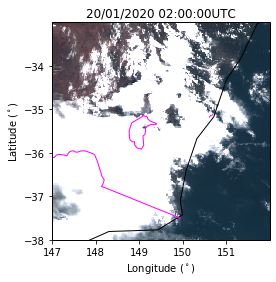

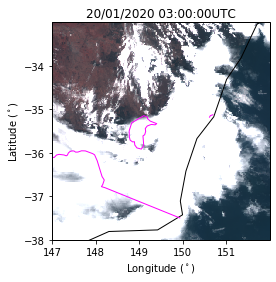

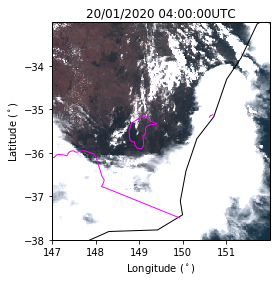

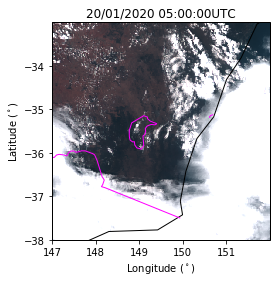

In [31]:
for ii,path in enumerate(paths):  
    print("Start %i, %s"%(ii,path))
    for jj in range(len(band_suffix)):
        src = gdal.Open(path + band_suffix[jj])
    
        dst = gdal.GetDriverByName('MEM').Create('', x_size, y_size, 1, gdal.GDT_Float32,)
        dst.GetRasterBand(1).WriteArray(np.zeros((y_size, x_size), dtype=np.float32))
        dst.SetGeoTransform(geot)
        dst.SetProjection(wgs84_wkt)
        dst.ReadAsArray().dtype
    
        err = gdal.ReprojectImage(src,dst,None,None,gdal.GRA_NearestNeighbour)

        arr = dst.ReadAsArray()
        
        if jj==0:
            arr_stack = arr.copy()
            arr_stack = np.expand_dims(arr_stack,axis=2)
       
        else:
            arr = np.expand_dims(arr,axis=2)
            arr_stack = np.append(arr_stack,arr,axis=2)
    # process rgb
    rgb = np.clip(arr_stack[:,:,[2,1,0]],0,0.5)
    rgb = rgb/rgb.max() * 255
    rgb = rgb.astype('uint8')
    # plot and save png
    plotter(rgb,ii)
    #plt.savefig("rgb/%04i.png"%ii)

In [2]:
!ffmpeg -y -r 1 -f image2 -s 1920x1080 -i rgb/%04d.png -vcodec libx264 -crf 25 -pix_fmt yuv420p test.mp4

ffmpeg version 4.1.3 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 4.9.0 (GCC)
  configuration: --prefix=/apps/ffmpeg/4.1.3 --enable-gpl --enable-libx264
  libavutil      56. 22.100 / 56. 22.100
  libavcodec     58. 35.100 / 58. 35.100
  libavformat    58. 20.100 / 58. 20.100
  libavdevice    58.  5.100 / 58.  5.100
  libavfilter     7. 40.101 /  7. 40.101
  libswscale      5.  3.100 /  5.  3.100
  libswresample   3.  3.100 /  3.  3.100
  libpostproc    55.  3.100 / 55.  3.100
Input #0, image2, from 'rgb/%04d.png':
  Duration: 00:00:02.00, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgba(pc), 432x288 [SAR 2834:2834 DAR 3:2], 1 tbr, 1 tbn, 1 tbc
Stream mapping:
  Stream #0:0 -> #0:0 (png (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x268ef80] using SAR=1/1
[libx264 @ 0x268ef80] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX
[libx264 @ 0x268ef80] profile Progressive High, level 2.1, 4:2:0, 8-bit
[libx264 @ 0x268ef80] 264 -

In [34]:
!ls /g/data/rr5/satellite/obs/himawari8/FLDK/2020/01/20/06*

/g/data/rr5/satellite/obs/himawari8/FLDK/2020/01/20/0610:
20200120061000-P1S-ABOM_BRF_B01-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc
20200120061000-P1S-ABOM_BRF_B03-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc
20200120061000-P1S-ABOM_BRF_B05-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc
20200120061000-P1S-ABOM_BRF_B06-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc

/g/data/rr5/satellite/obs/himawari8/FLDK/2020/01/20/0620:
20200120062000-P1S-ABOM_BRF_B01-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc
20200120062000-P1S-ABOM_BRF_B02-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc
20200120062000-P1S-ABOM_BRF_B03-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc
20200120062000-P1S-ABOM_BRF_B04-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc
20200120062000-P1S-ABOM_BRF_B05-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc
20200120062000-P1S-ABOM_BRF_B06-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc

/g/data/rr5/satellite/obs/himawari8/FLDK/2020/01/20/0630:
20200120063000-P1S-ABOM_BRF_B06-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc

/g/data/rr5/satellite/obs/himawari8/FLDK/2020/01/20/0650:
20200120065000-P1S-ABOM_BRF_B05-PRJ_GEO